# Spectral Estimation of Random Signals

*This jupyter/Python notebook is part of a [collection of notebooks](../index.ipynb) in the masters module [Digital Signal Processing](http://www.int.uni-rostock.de/Digitale-Signalverarbeitung.48.0.html), Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## The Periodogram

The [periodogram](https://en.wikipedia.org/wiki/Spectral_density_estimation#Periodogram) is an estimator for the power spectral density (PSD) $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$ of a random signal $x[k]$. We assume a weakly ergodic real-valued random process in the following.

### Definition

The PSD is given as the [discrete time Fourier transformation (DTFT) of the auto-correlation function (ACF)](../random_signals/power_spectral_densities.ipynb#Definition)

$$ \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \mathcal{F}_* \{ \varphi_{xx}[\kappa] \} $$

Hence, the PSD can be computed from an estimate of the ACF. Let's assume that we want to estimate the PSD from $N$ samples of the random signal $x[k]$ by way of the ACF. The truncated signal is given as

$$ x_N[k] = x[k] \cdot \text{rect}_N[k] $$ 

The ACF is estimated by using its definition in a straightforward manner. For a random signal $x_N[k]$ of finite length, the estimated ACF $\hat{\varphi}_{xx}[\kappa]$ can be expressed [in terms of a convolution](../random_signals/correlation_functions.ipynb#Definition)

$$ \hat{\varphi}_{xx}[\kappa] = \frac{1}{N} \cdot x_N[k] * x_N[-k] $$

Applying the DTFT to both sides and rearranging the terms yields

$$ \hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \frac{1}{N} \, X_N(\mathrm{e}^{\,\mathrm{j}\,\Omega})\, X_N(\mathrm{e}^{\,-\mathrm{j}\,\Omega}) = 
\frac{1}{N} \, | X_N(\mathrm{e}^{\,\mathrm{j}\,\Omega}) |^2 $$

where the latter equality has been derived by applying the symmetry relations of the DTFT. This estimate of the PSD is known as the periodogram. It can be computed directly from the DTFT 

$$ X_N(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = \sum_{k=0}^{N-1} x_N[k] \, \mathrm{e}^{\,-\mathrm{j}\,\Omega\,k}$$

of the truncated random signal (here for $0\leq k\leq N-1$).

### Example

The following example estimates the PSD of a random process which draws samples from normal distributed white noise with zero-mean and unit variance. The true PSD is given as $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) = 1$. In order to compute the periodogram by the discrete Fourier transformation (DFT), the signal $x[k]$ has to be zero-padded to ensure that above convolution is not circular.

Mean value of the periodogram: 0.960033


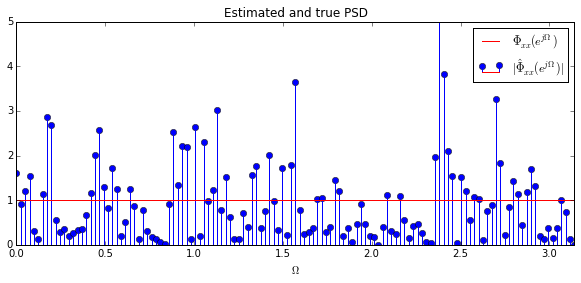

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 128  # number of samples

# generate random signal
x = np.random.normal(size=N)

# compute magnitude of the periodogram
x = np.concatenate((x, np.zeros_like(x)))
X = np.fft.rfft(x)
Om = np.linspace(0, np.pi, len(X))
Sxx = 1/N * abs(X)**2

# plot results
plt.figure(figsize=(10,4))
plt.stem(Om, Sxx, 'b', label=r'$|\hat{\Phi}_{xx}(e^{j \Omega})|$')
plt.plot(Om, np.ones_like(Sxx), 'r', label=r'$\Phi_{xx}(e^{j \Omega})$')
plt.title('Estimated and true PSD')
plt.xlabel(r'$\Omega$')
plt.axis([0, np.pi, 0, 5])
plt.legend()

# compute mean value of the periodogram
print('Mean value of the periodogram: %f' %np.mean(np.abs(Sxx)))

**Exercise**

* What do you have to change to evaluate experimentally if the periodogram is a consistent estimator?
* Based on the results, is the periodogram a consistent estimator?

### Evaluation

From above numerical example it should have become clear that the periodogram is no consistent estimator for the PSD $\Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})$. It can be shown that the estimator is asymptotically bias free when $N \to \infty$, hence

$$ \lim_{N \to \infty} E\{ \hat{\Phi}_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega})  \} = \Phi_{xx}(\mathrm{e}^{\,\mathrm{j}\,\Omega}) $$

This is due to the [leakage effect](../spectral_analysis_deterministic_signals/leakage_effect.ipynb) which limits the spectral resolution for signals of finite length.

The variance of the estimator does not converge towards zero

$$ \lim_{N \to \infty} \sigma^2_{\hat{\Phi}_{xx}} \neq 0 $$

This is due to the fact that with increasing $N$ also the number of independent frequencies $\Omega = \frac{2 \pi}{N} \mu$ for $\mu = 0,1,\dots,N-1$ increases.

The periodogram is the basis for a variety of advanced estimation techniques for the PSD. These techniques rely on averaging or smoothing of (overlapping) periodograms.

**Copyright**

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>